In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
import kagglehub
import os

path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

In [9]:
files = os.listdir(path)
print("Content of", files)

csv_file = files[0]
csv_path = os.path.join(path, csv_file)

# Load DataFrame
df = pd.read_csv(csv_path)
df = df.drop(columns=["DoctorInCharge"])  # Drop useless column


# Display the content of DataFrame
# df.head().T

Content of ['alzheimers_disease_data.csv']


<!-- @format -->

# First evaluation


In [10]:
from sklearn.model_selection import train_test_split
from functions.data_prep import data_preprocessing

X = np.array(df.drop(columns=["Diagnosis"]))
y = np.array(df["Diagnosis"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_scaled, X_test_scaled = data_preprocessing(X_train, X_test)

<!-- @format -->

## Logisitc Regression


[I 2025-01-28 10:39:30,178] A new study created in memory with name: no-name-8bd0aca8-3abd-4f8a-9cb7-85b53216c220
[I 2025-01-28 10:39:30,239] Trial 0 finished with value: 0.8341870635297308 and parameters: {'solver': 'newton-cg', 'penalty': 'l1', 'C': 0.1}. Best is trial 0 with value: 0.8341870635297308.
[I 2025-01-28 10:39:30,267] Trial 1 finished with value: 0.8359329446064139 and parameters: {'solver': 'lbfgs', 'penalty': None, 'C': 100}. Best is trial 1 with value: 0.8359329446064139.
[I 2025-01-28 10:39:30,293] Trial 2 finished with value: 0.8353549393179198 and parameters: {'solver': 'liblinear', 'penalty': None, 'C': 0.1}. Best is trial 1 with value: 0.8359329446064139.
[I 2025-01-28 10:39:30,353] Trial 3 finished with value: 0.8359329446064139 and parameters: {'solver': 'newton-cg', 'penalty': None, 'C': 10}. Best is trial 1 with value: 0.8359329446064139.
[I 2025-01-28 10:39:30,388] Trial 4 finished with value: 0.8353515492575768 and parameters: {'solver': 'liblinear', 'penalt

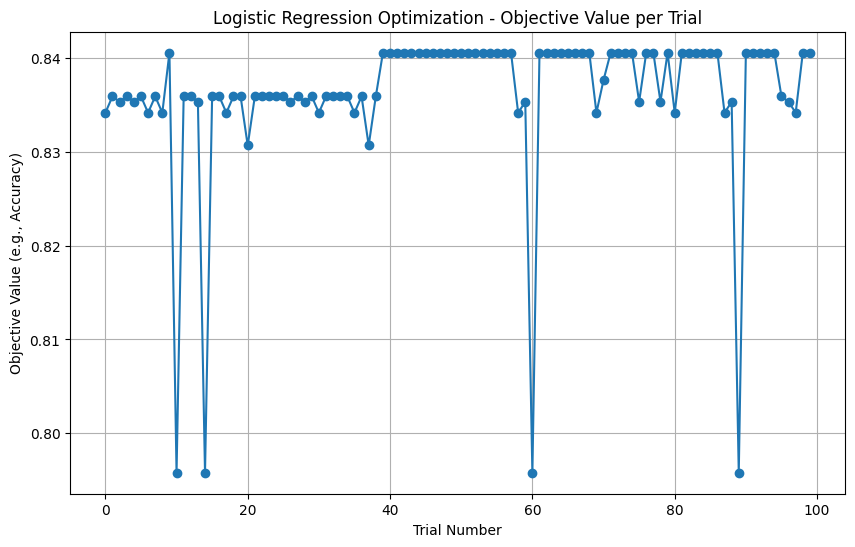

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best Value: 0.8405925825479693


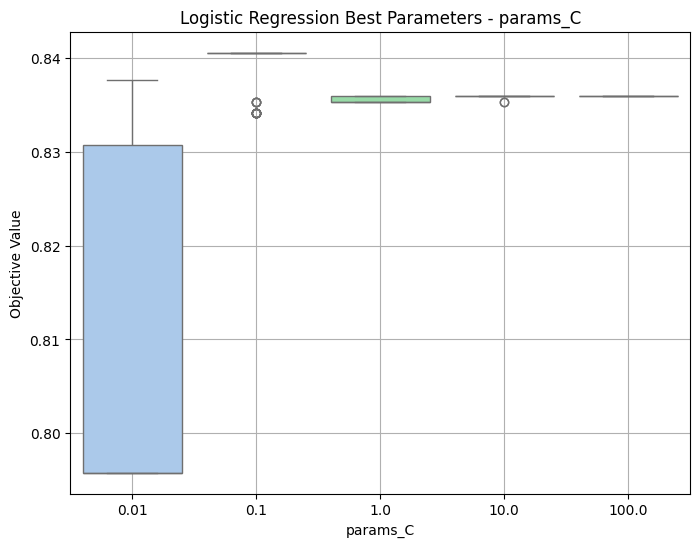

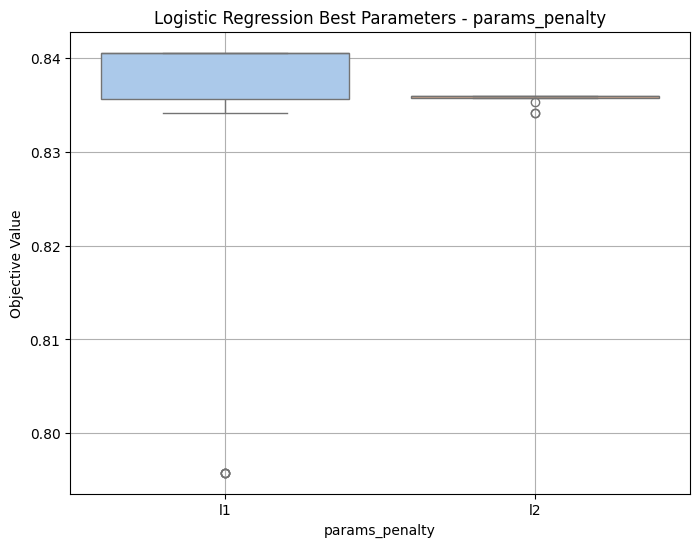

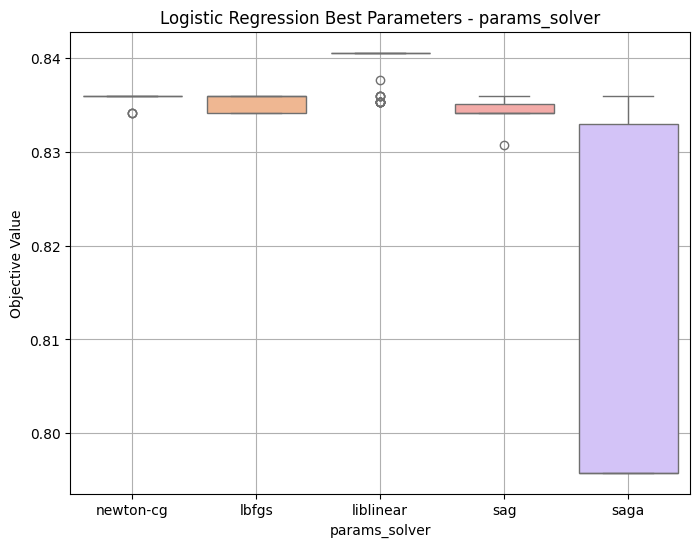

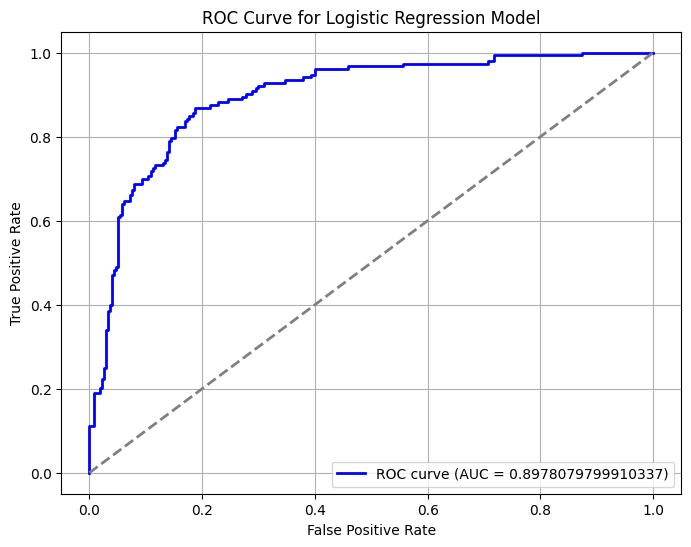

In [14]:
from models.logistic_regression import Logistic_Regression_
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

clf = Logistic_Regression_()
logistic_regression_model = clf.bayesian_opt(X_train_scaled, y_train)

# Wizualizujesz wyniki
clf.visualize_results(logistic_regression_model)

best_params = logistic_regression_model.best_params

model_log = LogisticRegression(**best_params)
# Dopasowanie modelu z najlepszymi parametrami na danych treningowych
model_log.fit(X_train_scaled, y_train)

# Użyj modelu do przewidywania prawdopodobieństw (nie klas)
y_pred_prob = model_log.predict_proba(X_test_scaled)

# Oblicz krzywą ROC i AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1]) 
roc_auc = auc(fpr, tpr)

# Tworzenie wykresu AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<!-- @format -->


<!-- @format -->

## Suppor Vector Machines


[I 2025-01-28 02:56:12,823] A new study created in memory with name: no-name-7778d26c-9ff2-4c71-9d4e-b9687ba0d42a
[I 2025-01-28 02:56:12,906] Trial 0 finished with value: 0.8429319371727749 and parameters: {'C': 0.0881700696535801, 'gamma': 'auto', 'kernel': 'linear', 'degree': 4, 'coef0': 0.8822756839992347}. Best is trial 0 with value: 0.8429319371727749.
[I 2025-01-28 02:56:13,123] Trial 1 finished with value: 0.8237347294938918 and parameters: {'C': 58.14686725329545, 'gamma': 'auto', 'kernel': 'rbf', 'degree': 4, 'coef0': 0.8972797084920356}. Best is trial 0 with value: 0.8429319371727749.
[I 2025-01-28 02:56:13,207] Trial 2 finished with value: 0.777196044211751 and parameters: {'C': 0.0019245924453048272, 'gamma': 'auto', 'kernel': 'linear', 'degree': 2, 'coef0': 0.5665538612704542}. Best is trial 0 with value: 0.8429319371727749.
[I 2025-01-28 02:56:13,379] Trial 3 finished with value: 0.8272251308900523 and parameters: {'C': 3.3388322026055666, 'gamma': 'scale', 'kernel': 'rbf

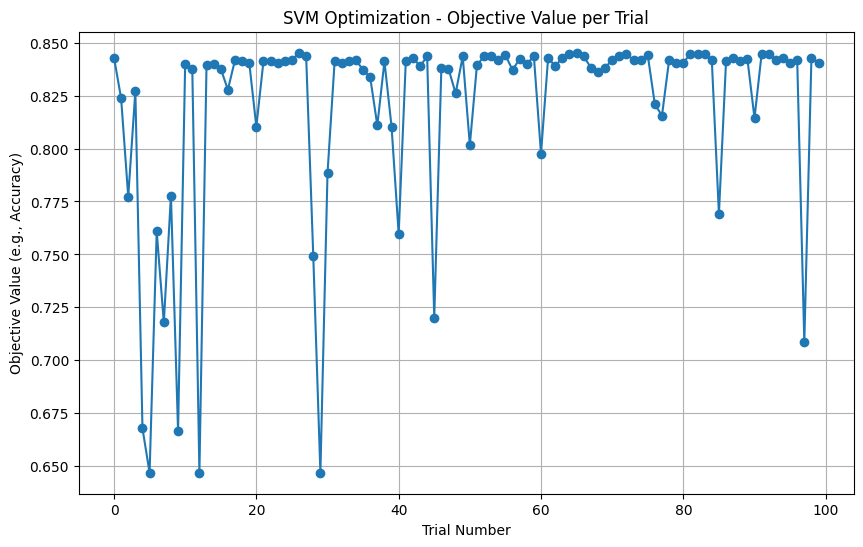

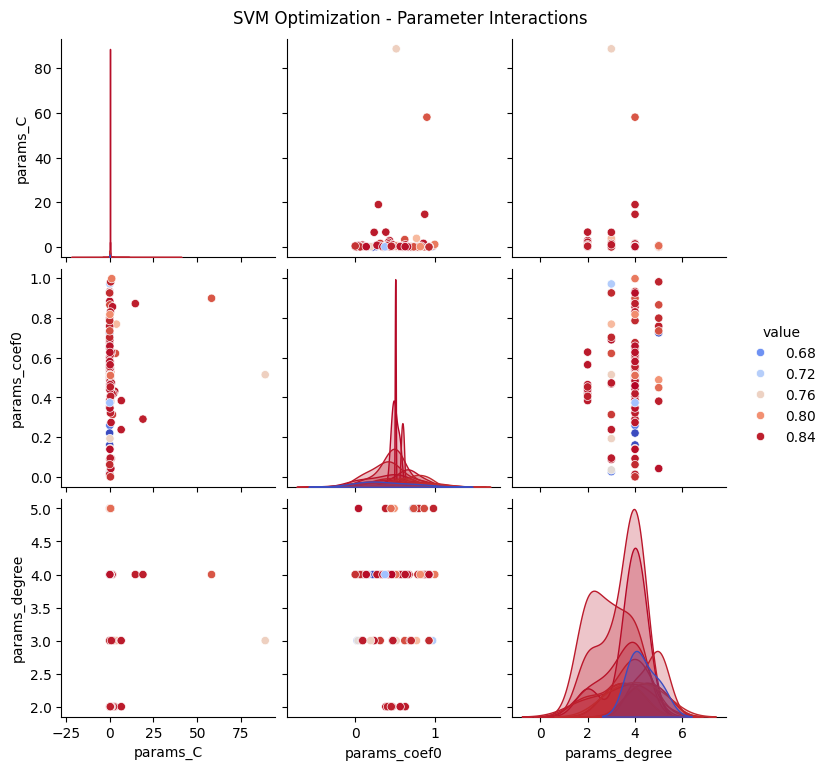

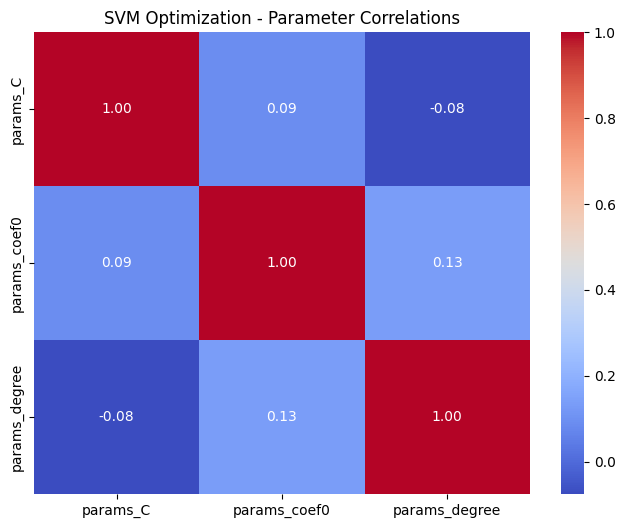

Best Parameters: {'C': 0.21338885195436258, 'gamma': 'auto', 'kernel': 'linear', 'degree': 3, 'coef0': 0.0914678833747391}
Best Value: 0.8452588714368819


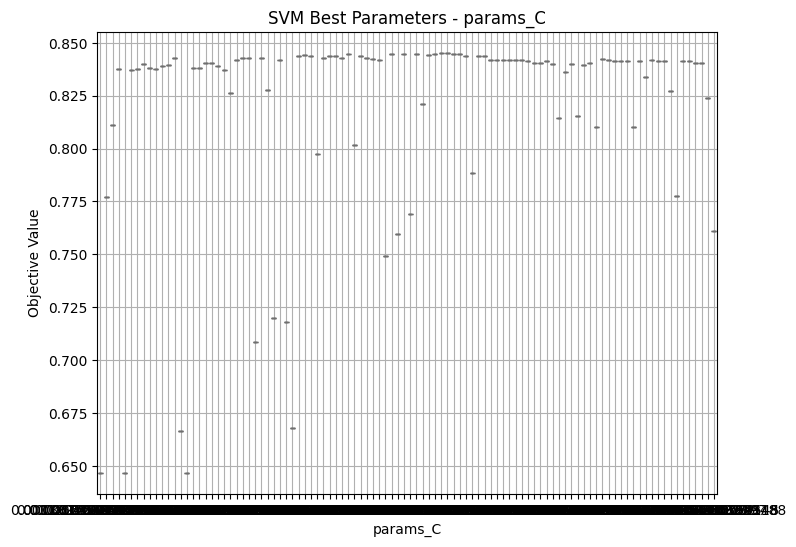

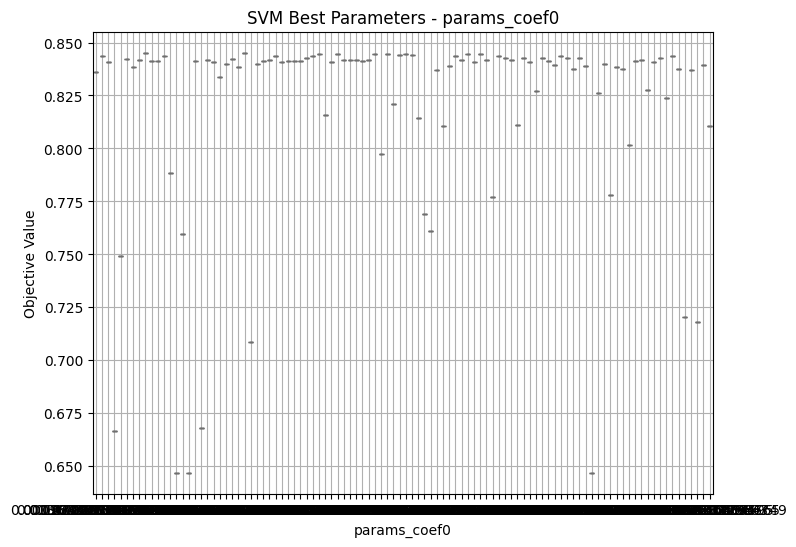

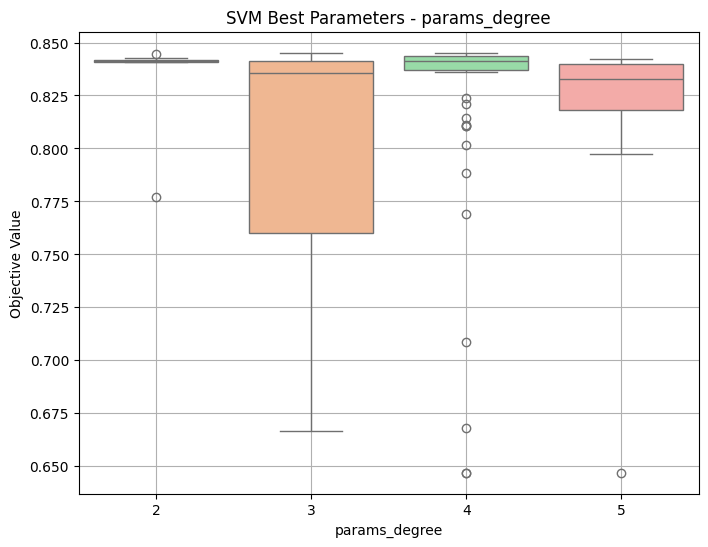

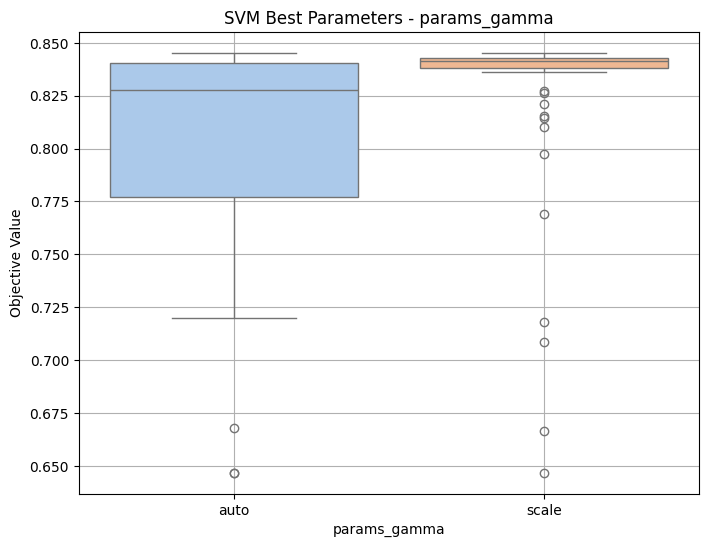

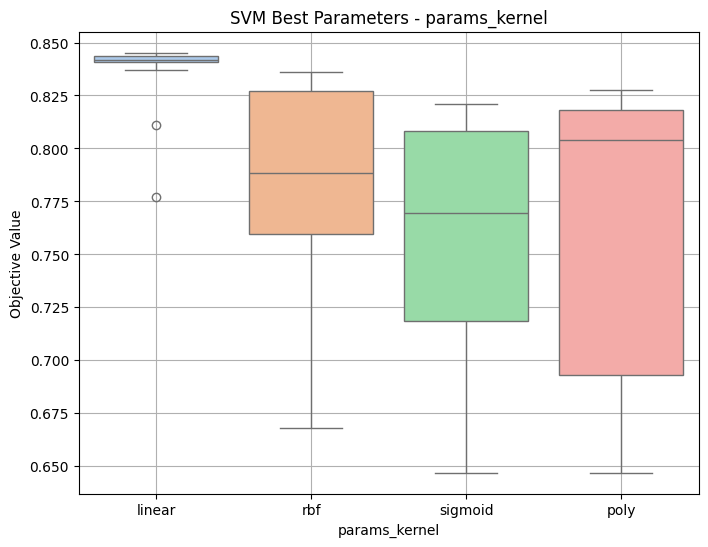

In [6]:
from models.svm import SVM

# Tworzymy instancję modelu SVM
clf = SVM()

# Optymalizujemy model za pomocą Optuna
study_svm = clf.bayesian_opt(X_train_scaled, y_train)

# Wizualizujemy wyniki
clf.visualize_results(study_svm)

<!-- @format -->

## XGBoost


In [10]:
from models.xgboost import XGBoost

clf = XGBoost()

study_XGB = clf.bayesian_opt(X_train_scaled, y_train)

[I 2025-01-28 04:22:47,276] A new study created in memory with name: no-name-66c9ed2a-4a01-4c6f-82d4-04538e64ca4a
[I 2025-01-28 04:22:53,656] Trial 0 finished with value: 0.9354275741710296 and parameters: {'max_depth': 9, 'learning_rate': 0.013695929005090014, 'n_estimators': 281, 'subsample': 0.7168553362329282, 'colsample_bytree': 0.6317752402555987, 'gamma': 0.0005613240407711991, 'lambda': 0.00013661362930308604, 'alpha': 0.13554200605050826, 'min_child_weight': 8}. Best is trial 0 with value: 0.9354275741710296.
[I 2025-01-28 04:23:00,572] Trial 1 finished with value: 0.9383362420011635 and parameters: {'max_depth': 5, 'learning_rate': 0.1474365214326693, 'n_estimators': 201, 'subsample': 0.8420741796891638, 'colsample_bytree': 0.9784202771372734, 'gamma': 0.00020647997490777167, 'lambda': 0.00011110438711309665, 'alpha': 0.05774034609708887, 'min_child_weight': 9}. Best is trial 1 with value: 0.9383362420011635.
[I 2025-01-28 04:23:12,743] Trial 2 finished with value: 0.94764397

<!-- @format -->

## Random Forest


[I 2025-01-28 02:57:29,882] A new study created in memory with name: no-name-fd48a97e-1da7-4180-86d3-99db3f63123f
[I 2025-01-28 02:57:30,495] Trial 0 finished with value: 0.925527154383348 and parameters: {'n_estimators': 61, 'max_depth': 25, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.925527154383348.
[I 2025-01-28 02:57:34,552] Trial 1 finished with value: 0.8522323547359143 and parameters: {'n_estimators': 441, 'max_depth': 4, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'log2'}. Best is trial 0 with value: 0.925527154383348.
[I 2025-01-28 02:57:35,207] Trial 2 finished with value: 0.8144230117296087 and parameters: {'n_estimators': 62, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 14, 'max_features': 'log2'}. Best is trial 0 with value: 0.925527154383348.
[I 2025-01-28 02:57:35,668] Trial 3 finished with value: 0.9325005085090515 and parameters: {'n_estimators': 37, 'max_depth': 28, 'min_s

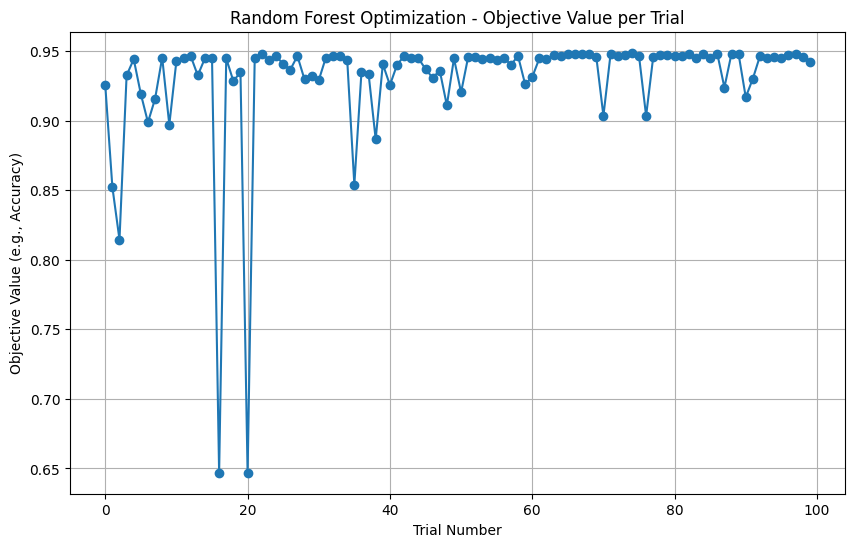

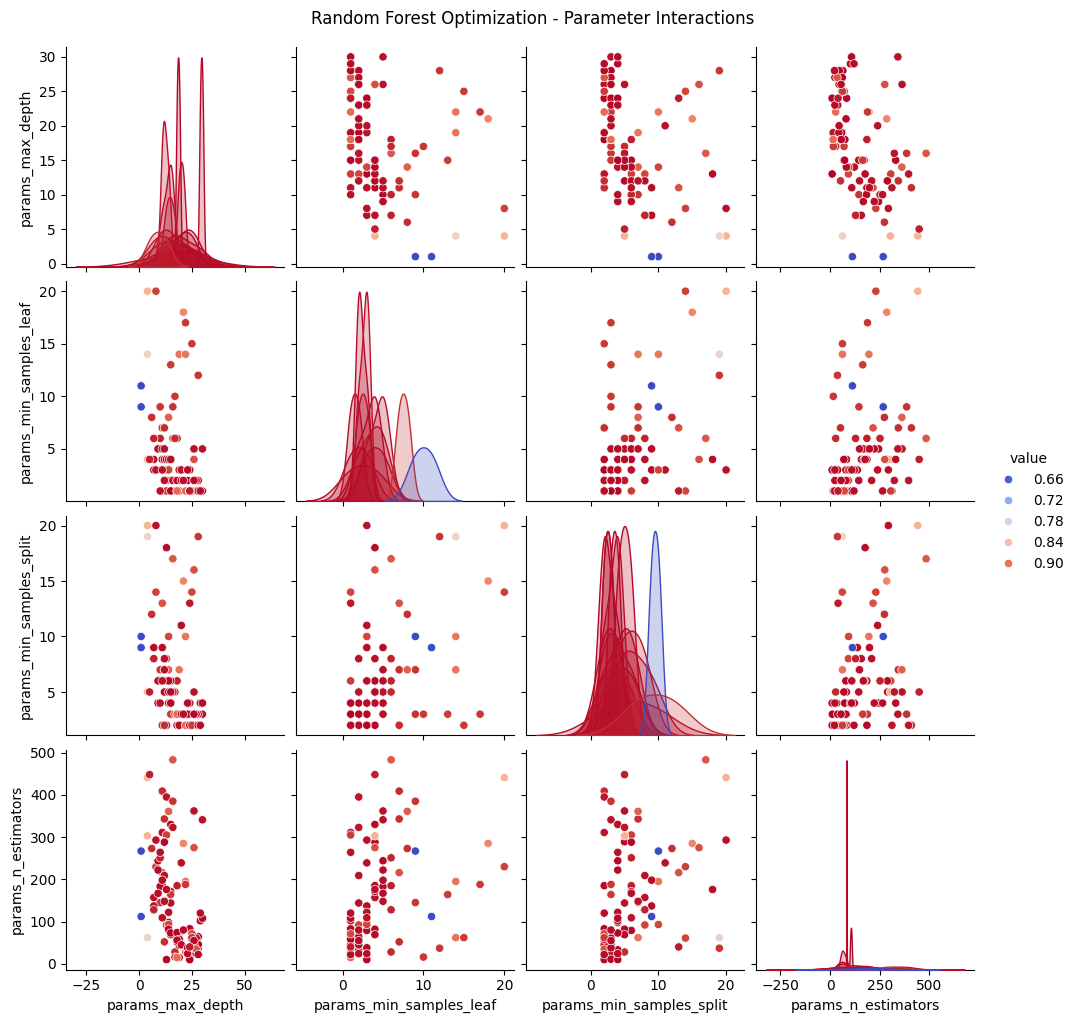

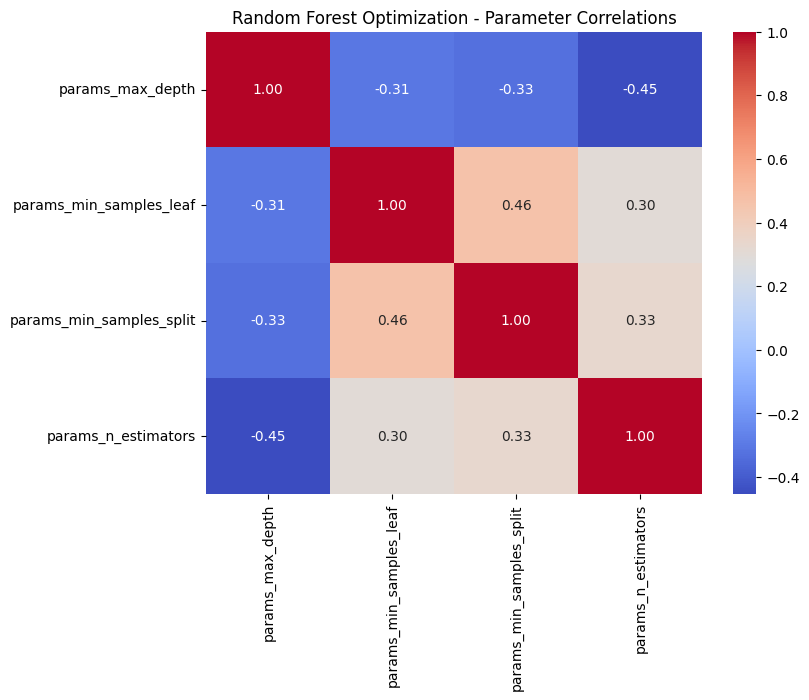

Best Parameters: {'n_estimators': 40, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}
Best Value: 0.9487965285782087


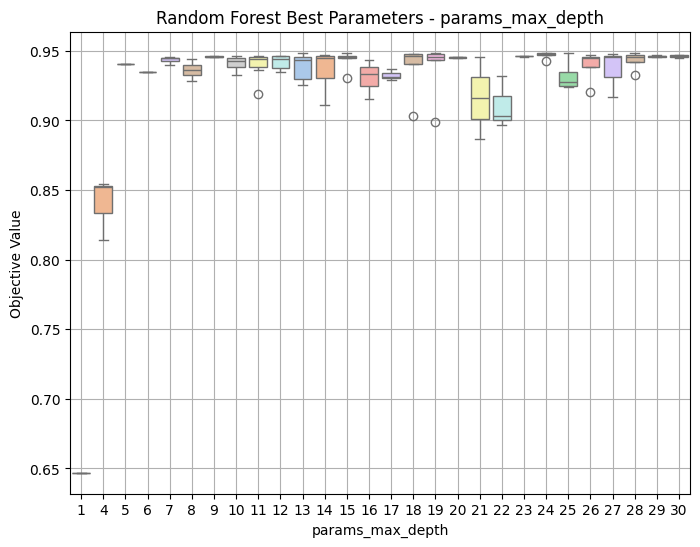

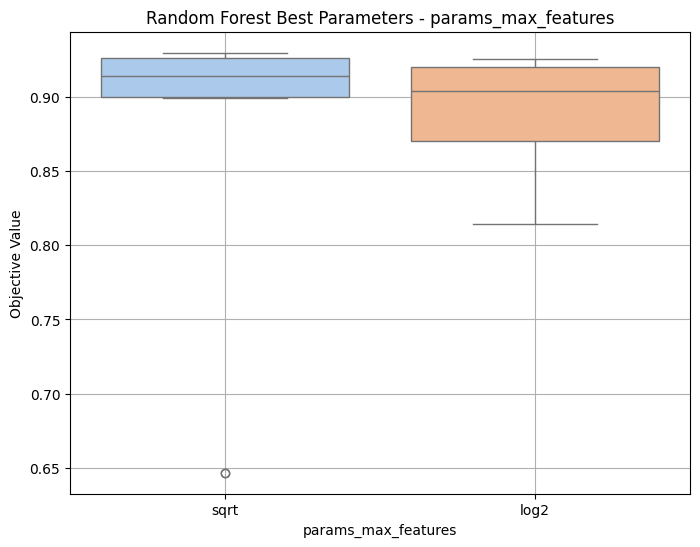

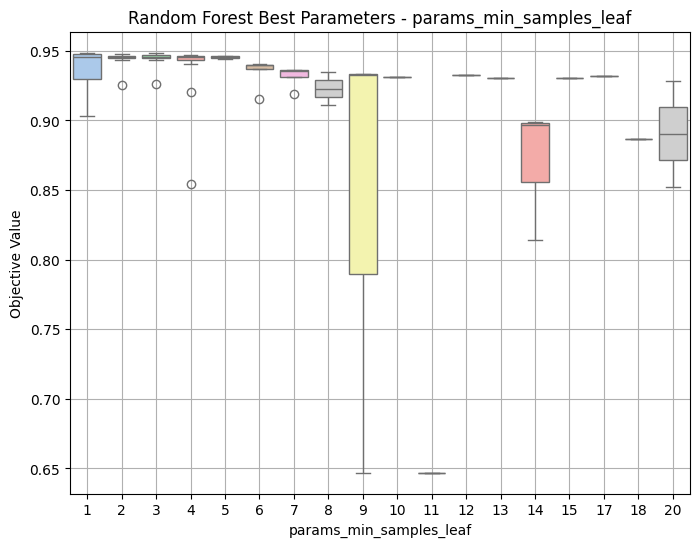

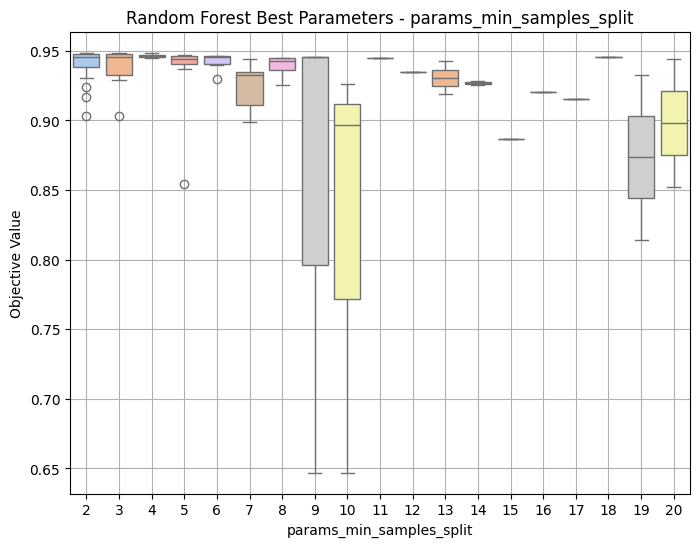

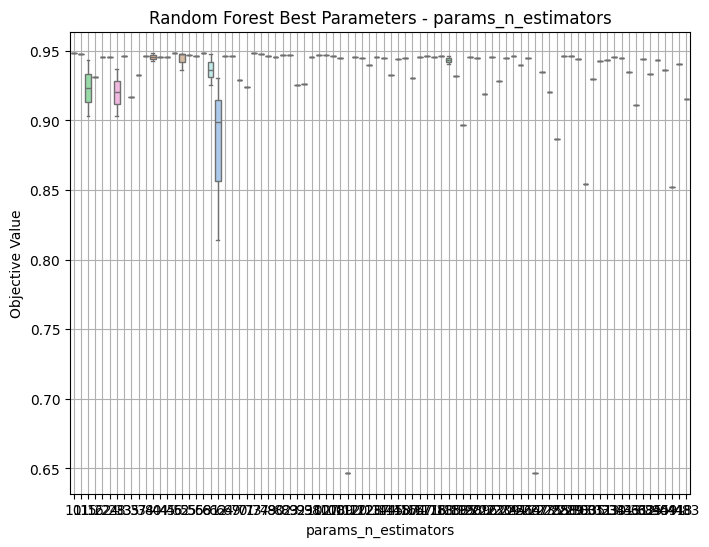

In [9]:
from models.random_forest import Random_Forest_

# Tworzymy instancję modelu Random Forest
clf = Random_Forest_()

# Optymalizujemy model za pomocą Optuna
study_rf = clf.bayesian_opt(X_train_scaled, y_train)

# Wizualizujemy wyniki
clf.visualize_results(study_rf)